In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,levene,bartlett,mannwhitneyu
import math
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from statsmodels.stats.power import ttest_power
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
df = pd.DataFrame([i.strip().split() for i in open("airq402.dat").readlines()])
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [7]:
#1.Import the data and assign appropriate column names.


In [ ]:
City1   1-3
City2   5-7
Average Fare    11-17
Distance      20-23
Average weekly passengers   26-33
market leading airline    36-37
market share     40-45
Average fare    48-54
Low price airline   57-58
market share    61-66
price     69-75

In [20]:
df.columns=["City1","City2","Average Fare","Distance","Average weekly passengers","market leading airline",
            "market share leading","Price Leading","Low price airline","market share trailing","Price Trailing"]

In [21]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share leading,Price Leading,Low price airline,market share trailing,Price Trailing
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [108]:
#2. Drop the variables which has textual information (categorical variables)


In [22]:
df1=df.drop(["City1","City2","market leading airline","Low price airline"],axis=1)
df1.head()

,Average Fare,Distance,Average weekly passengers,market share leading,Price Leading,market share trailing,Price Trailing
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [109]:
#3.Convert all the variable’s datatype to Integer .


In [36]:
df1["Average Fare"]=df1["Average Fare"].astype(float)
df1["Distance"]=df1["Distance"].astype(float)
df1["Average weekly passengers"]=df1["Average weekly passengers"].astype(float)
df1["market share leading"]=df1["market share leading"].astype(float)
df1["Price Leading"]=df1["Price Leading"].astype(float)
df1["market share trailing"]=df1["market share trailing"].astype(float)
df1["Price Trailing"]=df1["Price Trailing"].astype(float)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average Fare                 1000 non-null float64
Distance                     1000 non-null float64
Average weekly passengers    1000 non-null float64
market share leading         1000 non-null float64
Price Leading                1000 non-null float64
market share trailing        1000 non-null float64
Price Trailing               1000 non-null float64
dtypes: float64(7)
memory usage: 54.8 KB


In [38]:
df1["Average Fare"]=df1["Average Fare"].astype(int)
df1["Distance"]=df1["Distance"].astype(int)
df1["Average weekly passengers"]=df1["Average weekly passengers"].astype(int)
df1["market share leading"]=df1["market share leading"].astype(int)
df1["Price Leading"]=df1["Price Leading"].astype(int)
df1["market share trailing"]=df1["market share trailing"].astype(int)
df1["Price Trailing"]=df1["Price Trailing"].astype(int)

In [39]:
for col in df1.columns:
    print(col)
df1[col]=df1[col].astype(float)

Average Fare
Distance
Average weekly passengers
market share leading
Price Leading
market share trailing
Price Trailing


In [40]:
for col in df1.columns:
    print(col)
df1[col]=df1[col].astype(int)

Average Fare
Distance
Average weekly passengers
market share leading
Price Leading
market share trailing
Price Trailing


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average Fare                 1000 non-null int64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null int64
market share leading         1000 non-null int64
Price Leading                1000 non-null int64
market share trailing        1000 non-null int64
Price Trailing               1000 non-null int64
dtypes: int64(7)
memory usage: 54.8 KB


In [110]:
#4. Remove all the outliers from the data using IQR method (Retain data points within 1.5 * IQR) 


In [43]:
def out(df_in,col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    IQR = q3-q1
    uw = q3+(1.5*IQR)
    lw = q1-(1.5*IQR)
    df_out = df_in[~((df_in < (q1 - 1.5 * IQR)) |(df_in > (q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

In [45]:
df1=out(df1,df1.columns)

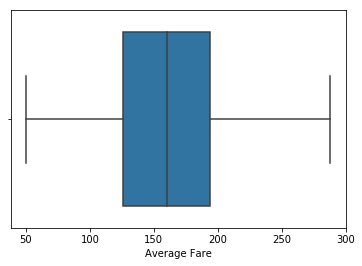

In [46]:
sns.boxplot(df1["Average Fare"])

In [111]:
# 5.Print the correlation matrix. 


In [48]:
df1.corr()

,Average Fare,Distance,Average weekly passengers,market share leading,Price Leading,market share trailing,Price Trailing
Average Fare,1.000000,0.522609,-0.197014,-0.207874,0.979620,-0.494021,0.840969
Distance,0.522609,1.000000,-0.129640,-0.547132,0.489541,-0.361448,0.539772
Average weekly passengers,-0.197014,-0.129640,1.000000,0.022685,-0.163634,0.076881,-0.208752
market share leading,-0.207874,-0.547132,0.022685,1.000000,-0.193264,0.280838,-0.314804
Price Leading,0.979620,0.489541,-0.163634,-0.193264,1.000000,-0.519736,0.794175
market share trailing,-0.494021,-0.361448,0.076881,0.280838,-0.519736,1.000000,-0.261183
Price Trailing,0.840969,0.539772,-0.208752,-0.314804,0.794175,-0.261183,1.000000


In [113]:
# 6.	Treat “Average Fare” –  as your Dependent Variable and the variable which
# has the highest correlation with Average Fare as the Independent Variable. Drop all the other variables 


In [64]:
y=df1["Average Fare"]
x=df1[["Price Leading"]]
df2=df1.drop(["Distance","Average weekly passengers","market share leading","market share trailing","Price Trailing"],axis=1)
df2.head()

,Average Fare,Price Leading
0,114,111
1,122,123
2,214,223
3,69,68
4,158,161


In [114]:
#7.	Create Scatter Plot of Independent Variable Vs Dependent Variable.


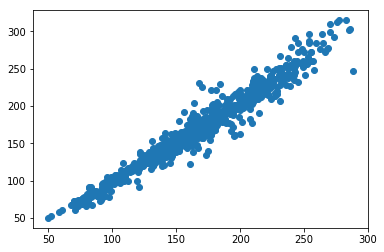

In [65]:
plt.scatter(df2["Average Fare"],df2["Price Leading"])

In [115]:
#8.	Divide the data set into training and test data set and build a Linear Regression model. 


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [76]:
LR=LinearRegression()
model=LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [68]:
x_train.shape

(619, 1)

In [69]:
y_train.shape

(619,)

In [70]:
LR.coef_

array([0.88483829])

In [71]:
LR.intercept_

16.1154252791778

In [73]:
#RMSE

In [77]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

8.928165429648958

In [78]:
#Multivariate analysis:

In [79]:
df1.head()

,Average Fare,Distance,Average weekly passengers,market share leading,Price Leading,market share trailing,Price Trailing
0,114,528,424,70,111,70,111
1,122,860,276,75,123,17,118
2,214,852,215,78,223,2,167
3,69,288,606,96,68,96,68
4,158,723,313,39,161,15,145


In [94]:
x=df1[["Distance","Average weekly passengers","market share leading",
      "Price Leading","market share trailing","Price Trailing"]]
y=df1["Average Fare"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

LR=LinearRegression()
model=LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)


In [83]:
x_train.shape

(619, 6)

In [84]:
y_train.shape

(619,)

In [85]:
LR.coef_

array([ 0.00370446, -0.00306758,  0.05960338,  0.75425803, -0.01515077,
        0.1935902 ])

In [86]:
LR.intercept_

4.9575621394901646

In [95]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

7.6259530822839245

In [96]:
# As seen above, RMSE value has been decreased after doing multivariate analysis. 
#Multivariate is good as compared to univariate analysis.

In [97]:
#Trying the same using OLS method:


In [98]:
import statsmodels.formula.api as smf

In [100]:
model=smf.ols("y~x",df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5076.
Date:                Thu, 29 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:17:46   Log-Likelihood:                -3107.9
No. Observations:                 885   AIC:                             6230.
Df Residuals:                     878   BIC:                             6263.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1349      1.886      2.722      0.007       1.433       8.837
x[0]           0.0029      0.001      4.663      0.000       0.002       0.004
x[1]          -0.0032      0.001     -3.781      0.000      -0.005      -0.002
x[2]           0.0737      0.018      4.160      0.000       0.039       0.109
x[3]           0.7454      0.010     71.699      0.000       0.725       0.766
x[4]          -0.0302      0.013     -2.304      0.021      -0.056      -0.004
x[5]           0.2077      0.013     15.930      0.000       0.182       0.233
==============================================================================
Omnibus:                      185.050   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.048
Skew:                           0.899   Prob(JB):                    1.89e-179
Kurtosis:                       7.369   Cond. No.                     8.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#As can be seen from above summary, p value of all the independent variables is less than 0.05, hence, we reject the 
#null hypothesis and that means that all the 6 independent variables contribute towards the dependent variables.


In [102]:
#1.	Print the train and test accuracy of the model .


In [104]:
print("R squared value is 0.972")
print("RMSE value is %1.4f"%np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R squared value is 0.972
RMSE value is 7.6260


In [118]:
#10.	Print the coefficient and the intercept of the model .


In [106]:
LR.coef_

array([ 0.00233598, -0.00408732,  0.08763608,  0.74950082, -0.03741883,
        0.20235867])

In [107]:
LR.intercept_

5.564076516643212